In [ ]:
# 处理时间序列的一个入门视频
https://www.youtube.com/watch?v=ZuydOEws92s&ab_channel=HadiFanaee

1) Time Series Forecasting
-- Time Series Components
----- Level
----- Noise
----- Trend
----- Seasonality
----- Outlie
-- Stationarity
----- Seasonal-Trend Decomposition
----- Augmented Dickey-Fuller Test
----- Logarithmic/Square root/Box-Cox transform
----- Trend Removal via differencing
----- Fixing Non-constant Variance + Trend Removal
-- Statistical Models
----- Exponential Smoothing 
----- Autoregressive Model (AR)
----- Moving Average Model (MA)
----- ARMA
----- ARIMA
----- SARIMA
-- State Space Models
----- Kalman Filter
----- Hidden Markov Model
-- Deep Learning Models
----- Feed-forward Neural Networks 
----- One-dimensional Convolutional Neural Networks 
----- Recurrent Neural Network
- Other Models: Facebook Prophet

2) Mining Time Series
    Matrix Profile
    Motifs
    Discords

3) Time Series Transformation
-- Fourier Transform
-- Wavelets
-- Piecewise Aggregate Approximation (PAA)
-- Symbolic Aggregate Approximation (SAX)

4) Time Series Clustering/Classification

5) Preparation of Time Series Data

-- Missing Values
-- Noise Removal
-- Normalization
-- Resampling


# 时间序列中，有四种方法可以检测时间序列稳定性
 
1. 目测
 - 不恒定方差
 - 不恒定均值
 - 季节性
2. 季节趋势分解：如下

            data
Month           
1949-01-01   112
1949-02-01   118
1949-03-01   132
1949-04-01   129
1949-05-01   121
...          ...
1960-08-01   606
1960-09-01   508
1960-10-01   461
1960-11-01   390
1960-12-01   432

[144 rows x 1 columns]


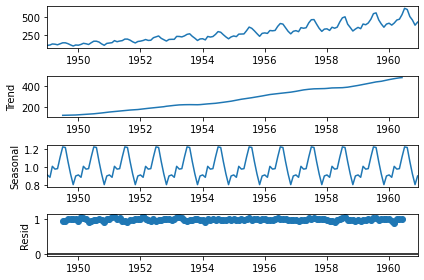

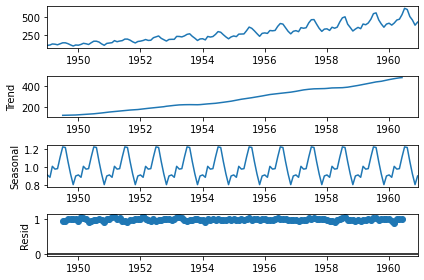

In [78]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('dataset/passengers.csv',header=0)
df.Month=pd.to_datetime(df.Month)
df=df.set_index('Month')
result =seasonal_decompose(df,model='multiplicative')
result.plot() 

3. 计算随机不同分区的统计数据，然后对比。
如果分区均值不同，这意味着有烦人的固定时间序列
4. 统计测试
运用统计学知识，如下面的ADF测试

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('dataset/passengers.csv',header=0,index_col=0)
result=adfuller(df.values)#单位根检测  P值检测
print('p-value:%f' % result[1]) 
#p-value:0.991880 说明他有99%以上可能性嗷 （显著的不稳定）

p-value:0.991880


3. 修复不恒定方差
- 用log sqrt boxcox：

lambda:0.148023


C:\Users\shen7\AppData\Local\Temp\ipykernel_51632\3655447414.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)


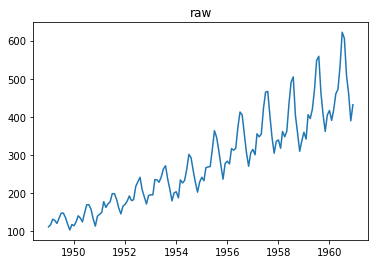

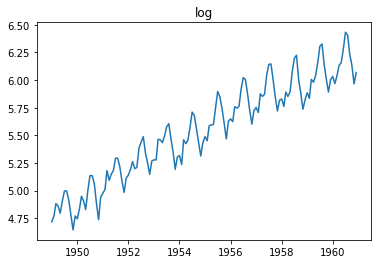

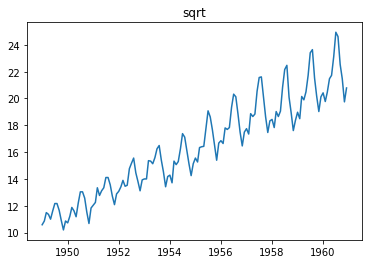

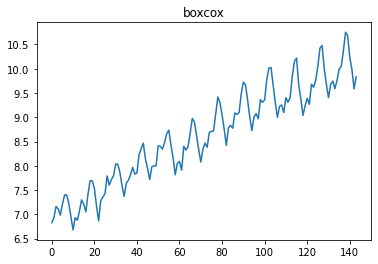

In [118]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
series=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)
series_log=np.log(series)
series_sqr=np.sqrt(series)
series_boxcox,lam=scipy.stats.boxcox(series)
print("lambda:%f" % lam)

plt.plot(series)
plt.title('raw')
plt.show()
plt.plot(series_log)
plt.title('log')
plt.show()
plt.title('sqrt')
plt.plot(series_sqr)
plt.show()
plt.title('boxcox')
plt.plot(series_boxcox)
plt.show()

#易看出，每个峰值与峰低 的距离没有那么显著， 方差明显的修复

4. 消除趋势
- 通过差分

C:\Users\shen7\AppData\Local\Temp\ipykernel_51632\2217682727.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)


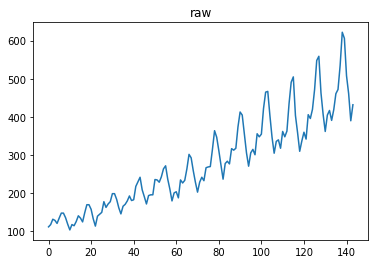

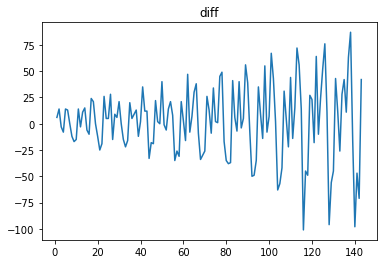

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
series=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)
diff=series.diff()

plt.title('raw')
plt.plot(series.values)
plt.show()

plt.title('diff')
plt.plot(diff.values)
plt.show()

#可以看到  已经消除了趋势，现在的数据没有趋势

5. 将方差修复和趋势消除结合起来
- 运用 coxbox 和 差分

lambda:0.148023


C:\Users\shen7\AppData\Local\Temp\ipykernel_51632\1993392524.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)


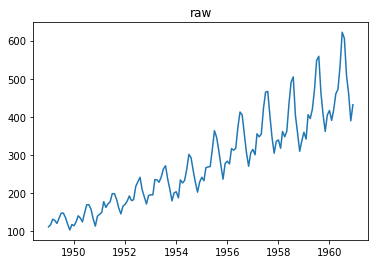

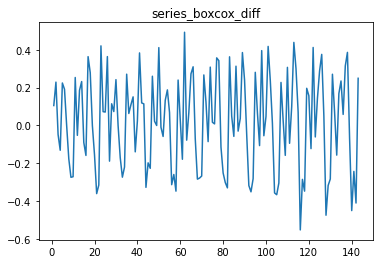

In [120]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
series=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)
series_boxcox,lam=scipy.stats.boxcox(series)
print("lambda:%f" % lam)
series_boxcox=pd.DataFrame(series_boxcox)
series_boxcox_diff=series_boxcox.diff()

plt.title('raw')
plt.plot(series)
plt.show()

plt.title('series_boxcox_diff')
plt.plot(series_boxcox_diff)
plt.show()



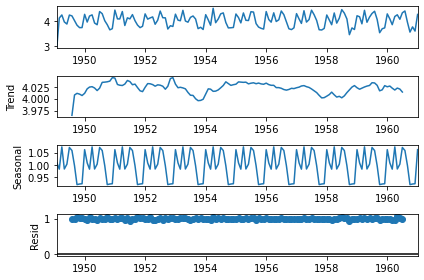

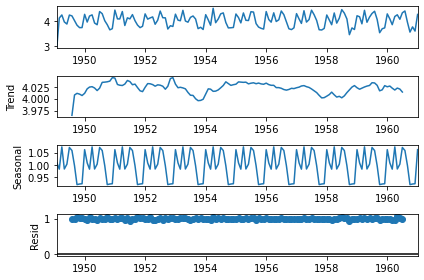

In [116]:
######将方差修复和趋势消除完成后的数据，运用seasonal_decompose，看是否具有特性

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('dataset/passengers.csv',header=0)

df.Month=pd.to_datetime(df.Month)
df=df.set_index('Month')
#使满足算法满足   不可运用0和负数
series_boxcox_diff[0][0]=1
series_boxcox_diff=series_boxcox_diff+2

#创造时间序列 并赋予series_boxcox_diff
dates_indexes = pd.date_range('1949-01', periods=144, freq='M')
series_boxcox_diff = pd.Series(series_boxcox_diff[0].values, index=dates_indexes)

result =seasonal_decompose(series_boxcox_diff,model='multiplicative')
result.plot() 

#可以观察到序列的 趋势不见了（） 季节性还在
#这个闹着玩的，上一个代码就能够明显 看出方差修复和趋势消除

---
# 统计模型

- 指数平滑法
- 双指数平滑法
- 三指数平滑法（Holt Winter 的指数平滑）

C:\Users\shen7\AppData\Local\Temp\ipykernel_27896\3393535261.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)


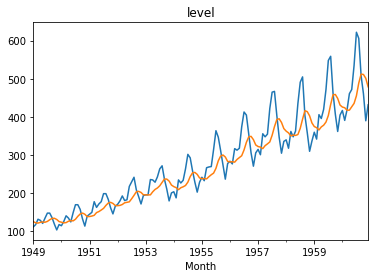

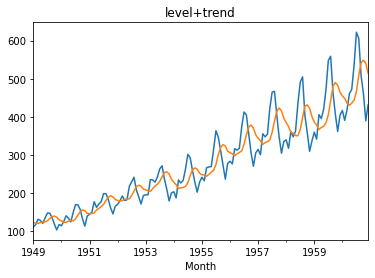

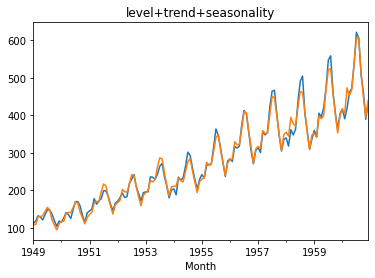

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)
df.index.freq='MS'
ts=df
#指数平滑 level=0.2
esl=SimpleExpSmoothing(ts).fit(smoothing_level=0.2)
ts_esl=esl.predict(start=ts.index[0],end=ts.index[-1])
#双指数平滑 level=0.2 + trend=0.2
es2=ExponentialSmoothing(ts,trend='add').fit(smoothing_level=0.2,smoothing_trend=0.2)
ts_es2=es2.predict(start=ts.index[0],end=ts.index[-1])
#三指数平滑 level=0.2 + trend=0.2 + seasonality=0.2
es3=ExponentialSmoothing(ts,trend='add',seasonal='mul',
                        seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.2,
                                                smoothing_seasonal=0.2)
ts_es3=es3.predict(start=ts.index[0],end=ts.index[-1])


ts.plot()
ts_esl.plot()
plt.title('level')
plt.show()

ts.plot()
ts_es2.plot()
plt.title('level+trend')
plt.show()

ts.plot()
ts_es3.plot()
plt.title('level+trend+seasonality')
plt.show()

- 自回归模型(AR)

[-2.04707659e-01  3.25412593e-01 -2.24202355e-01 -8.05235219e-01
  1.41790475e+00  2.65814320e+00  1.73203909e+00  9.16239670e-01
  1.02319255e+00  1.78476923e+00  2.08996814e+00 -1.74937309e-01
 -3.78703384e-01 -1.13803320e-02  1.43905743e+00  1.96856750e+00
 -8.84976044e-01 -1.52771644e+00  7.44481987e-01  5.01720866e-01
 -3.49571293e-01  8.93763242e-02  3.40336899e+00  1.50895513e+00
 -2.96213199e-01 -4.75277407e-01  2.02088064e-02  6.57748025e-01
  4.89199095e-01  1.54627211e+00  3.23860323e-01 -9.74826324e-01
 -3.18231648e+00 -4.00379157e+00 -3.06802195e+00 -7.39923281e-01
 -1.05387146e+00 -4.85595653e-01 -1.16424132e+00 -4.18899363e-01
 -2.38253300e+00 -1.88171786e+00 -2.35765068e+00 -2.26854445e+00
 -2.41902592e+00 -9.60783581e-01  2.62152906e-01 -3.17075960e-01
  2.79404536e-02  1.44996654e+00  1.15036648e+00  7.46957337e-01
  2.60764781e-01  1.01364584e+00  2.02223780e+00  3.44005332e-01
 -1.79666189e+00 -1.41131315e+00  1.49043754e-01 -1.95913225e-01
  6.78384226e-01  5.47734

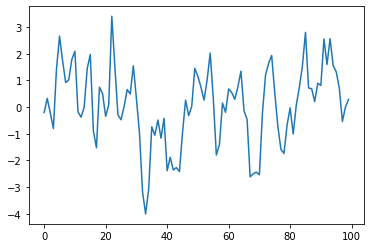

In [1]:
#模拟数据  x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

#######模拟AR(2)哦！
np.random.seed(12345)
ar_params=np.array([.75,-.25])
ar=np.r_[1,-ar_params]  #按列连接矩阵
arma_process=sm.tsa.ArmaProcess(ar,ma=None)
x=arma_process.generate_sample(100)
#然后得出模拟数据
plt.plot(x)
print(x)

Coefficients:[ 0.00834148  0.86040337 -0.26500192]


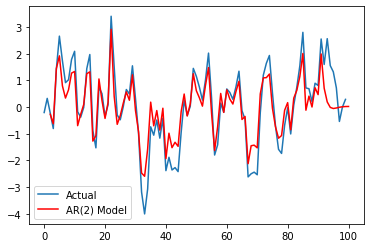

In [41]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

train,test = x[1:len(x)-7],x[len(x)-7:]
model=AutoReg(train,lags=2)
model_fit=model.fit()
#这三个参数得出来 就可以用上面得得模拟数据来进行预测了
print("Coefficients:%s" % model_fit.params)
x_ar=model_fit.predict(start=0,end=len(x),dynamic=False)
#x_ar滞后1位，会画空值，直接与原来数据一一对应即可
#此时红线都是预测的值
plt.plot(x,label="Actual")
plt.plot(x_ar,color='red',label='AR(2) Model')
plt.legend(loc='best')

Coefficients:[ 0.02175096  0.85130269 -0.25991178  1.08008479]


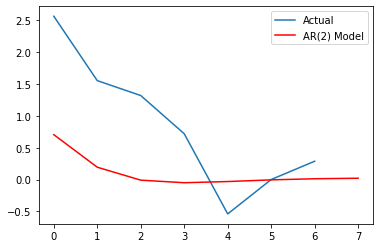

In [44]:
#这个用from statsmodels.tsa.arima.model import ARIMA包中的ARIMA整合包就可以了
#它里面包含了 AR(p) MA(d) ARMA(p,d) ARIMA(p,d,q)  SARIMA(p,d,q) 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

train,test = x[1:len(x)-7],x[len(x)-7:]
model=ARIMA(train,order=(2,0,0))   ##AR(2)
model_fit=model.fit()
#这三个参数得出来 就可以用上面得得模拟数据来进行预测了
#这。。四个参数 最后一个是方差
print("Coefficients:%s" % model_fit.params)
xx_ar=model_fit.predict(start=len(train),end=len(x)-1,dynamic=False)
plt.plot(x[len(x)-7:],label="Actual")
plt.plot(xx_ar,color='red',label='AR(2) Model')
plt.legend(loc='best')

- 移动平均模型(MA)

D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

参数：const     9.373026
ma.L1     1.235718
ma.L2     0.407276
ma.L3    -0.903959
ma.L4    -1.034094
ma.L5    -0.701946
sigma2    6.119616
dtype: float64
预测是=5.783951,测试预期值=4.000000 
预测是=7.090820,测试预期值=4.900000 
预测是=8.997852,测试预期值=3.600000 
预测是=9.148240,测试预期值=3.200000 
预测是=9.060168,测试预期值=7.300000 
预测是=9.373026,测试预期值=11.100000 
预测是=9.373026,测试预期值=18.200000 
Test RMSE：4.728283


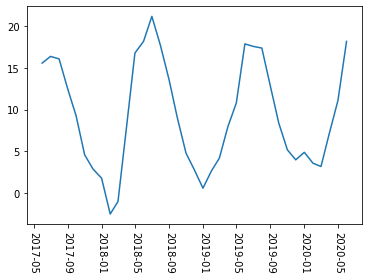

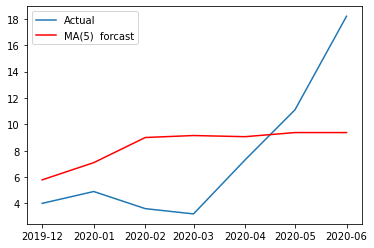

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

####ARIMA(p,d,q)   ARMA(p,q)
#######模拟MA(5)哦！
df=pd.read_csv('dataset/HalmstadTempM.csv',header=0,parse_dates=[0],index_col=0)
dftrain,dftest=df[:len(df)-7],df[len(df)-7:]
model=ARIMA(dftrain,order=(0,0,5))  #MA(5)
model_fit=model.fit()
print("参数：%s" % model_fit.params)
#预测值 从开始len(dftrain)  结束len(dftarin)+len(dftest)-1
predictions=model_fit.predict(start=len(dftrain),
                              end=len(dftrain)+len(dftest)-1,dynamic=False)
for i in range(len(predictions)):
    print("预测是=%f,测试预期值=%f " % (predictions[i],dftest.values[i]))
rmse=np.sqrt(mean_squared_error(dftest.values,predictions))#均方差的标开平方(均方根误差)
print("Test RMSE：%f" % rmse)

plt.xticks(rotation=270)
plt.plot(df,label="row")
plt.show()
plt.plot(dftest,label="Actual")
plt.plot(predictions,color='red',label='MA(5)  forcast')
plt.legend(loc='best')
plt.show()


可以看出来刚开始很准确但是后来非常糟糕，这是MA的缺点
MA非常擅长“向前迈出一步”，但是后来就不行了


那么现在我们来到了（差分是他俩的分别）
- 自回归滑动平均模型(ARMA)
- 自回归差分滑动平均模型(ARIMA)：ARIMA在对数据进行ARMA拟合前先进行一次差分
- 季节性差分自回归滑动平均模型(SARIMA):又加上季节性 参数:(p,d,q)(P,D,Q)m

参数：[ 0.07665223  0.84030725 -0.22803848  1.05267522]


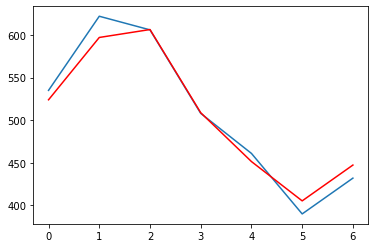

In [26]:
#我们再回去飞机航班数据计算SARIMA拟合
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import pandas as pd
#这个包pmdarima.auto_arima输入p,d,q和max_p,d,q会自动找到最合适的超参数 
df=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0)
train,test=df[1:len(df)-7],df[len(df)-7:]

model=auto_arima(train,start_p=1,d=1,start_q=1,max_p=3,max_q=3,m=12,
                start_P=0,D=1,start_Q=0,seasonal=True ,trcae=True,error_action='ignore',
                suppress_warnings=True,stepwise=True)
model.fit(train)
print("参数：%s" % model_fit.params)
forecast=model.predict(n_periods=len(test))
plt.plot(test.values,label="Actual")
plt.plot(forecast,color='red',label='sarima'+str(model.order)+str(model.seasonal_order))
plt.show()

D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


参数：ar.L1      -0.037871
ar.L2      -0.034286
ar.L3       0.476889
ma.L1      -0.264704
ma.L2       0.100491
ma.L3      -0.753321
sigma2    121.745531
dtype: float64


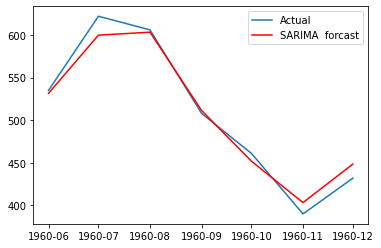

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#跟上面一样  用了不同的库而已
####ARIMA(p,d,q)   ARMA(p,q)  
####SARIMA(p,d,q)(P,D,Q,M): order=(3,1,3),seasonal_order=(0, 1, 0, 12)
#####from statsmodels.tsa.arima.model import ARIMA也有SARIMA的功能 

df=pd.read_csv('dataset/passengers.csv',header=0,parse_dates=[0],index_col=0)
dftrain,dftest=df[1:len(df)-7],df[len(df)-7:]
model=smm.ARIMA(dftrain,order=(3,1,3),seasonal_order=(0, 1, 0, 12))  #MA(5)
model_fit=model.fit()
print("参数：%s" % model_fit.params)
#预测值 从开始len(dftrain)  结束len(dftarin)+len(dftest)-1
predictions=model_fit.predict(start=len(dftrain),
                              end=len(dftrain)+len(dftest)-1,dynamic=False)

plt.plot(dftest,label="Actual")
plt.plot(predictions,color='red',label='SARIMA  forcast')
plt.legend(loc='best')
plt.show()


这些模型的优点是：
- 简单，透明，严格
- 在小数据集上的最先进的性能优于ML/深度学习

缺点：
- 更多的数据没有提升
- 对非常大的数据不太好
- 无法捕捉非线性动态
- 只能提前一步预测，再多的不太好使了

- ACF和PACF
通过这个找出pq的值。
有笔记在markdown上

# 状态空间模型
- 卡尔曼滤波

In [ ]:
##了解一下原理就好

- 隐马尔可夫模型(HMM)

In [175]:
import numpy as np
from hmmlearn import hmm
states =["45","50","55"]#开始状态？！！我不需要开始状态就可以hmm，只要有状态分布即可
observations=["200","225","250","270","300"]#之后到达的速度的观测值
start_probability=np.array([0.1,0.8,0.1])#概率
transition_probability=np.array([
    [0.6,0.3,0.1],
    [0.1,0.7,0.2],
    [0.1,0.3,0.6]
])
emission_probability=np.array([
    [0.2,0.5,0.2,0.05,0.05],
    [0.05,0.15,0.6,0.15,0.05],
    [0.05,0.15,0.2,0.5,0.1]
])

n_states=len(states)
n_observation=len(observations)
#hmm
model=hmm.MultinomialHMM(n_components=n_states) #状态的个数
model.startprob=start_probability  #初始状态的分布
model.transmat=transition_probability #状态间转移概率的矩阵
model.emissionprob=emission_probability #到达 观测值的概率，在每种状态下发射给定符号的概率。

observed_dx=np.array([[225,225,225,250,275,300]]).T #当到达这几个值时。   一维的，我们可以弄二维的
model=model.fit(observed_dx) #放入个体样本特征矩阵，返回本身
hidden_states=model.predict(observed_dx) #找出与' ' X ' '相对应的最有可能的状态序列。
print(hidden_states)
print("possible velocity:", ",".join(map(lambda x:states[x],hidden_states)))#根据索引找到该值


Fitting a model with 908 free scalar parameters with only 6 data points will result in a degenerate solution.


[1 1 0 2 2 2]
possible velocity: 50,50,45,55,55,55


# 深度学习模型
有大量数据，且你不用有很多统计学知识，不用知道什么季节性啥的，纯纯的只有数据，你希望得到一些东西

但是当段内值的顺序相关度不高时，可以使用前馈神经网络和一维卷积
在我嗯时间序列中，顺序是重要的，在应用中使用rnn比较好


这些模型的优点是：
- 对噪声和缺失值具有鲁棒性
- 它可以学习时间序列中的线性和非线性关系，他们直接支持多部和多变量预测（不用关心是否平稳，是否是季节性），也不用什么动态空间模型

缺点：
- 在单变量时间序列预测问题上，经典方法的效果优于它们(即短期预测不好)
- 对于选择和培训架构的最佳实践和经验规则的指导较少

---
!!!https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0194889

"尽管我们论文的结论是机器学习模型的预测准确性低于统计方法，这似乎令人失望，但我们对机器学习模型在预测应用中的巨大潜力非常乐观。"

In [ ]:
# 视频中代码就是将整串数据分割开 成一个个的三个一组的list，使用了kear库的。so不想写

这一段跳过去

---
---

# 挖掘时间序列
- Matrix Profile
- Motifs
- Discords

# 时间序列转化
- 傅里叶变化

D:\Anaconda3\envs\ts\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\ts\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


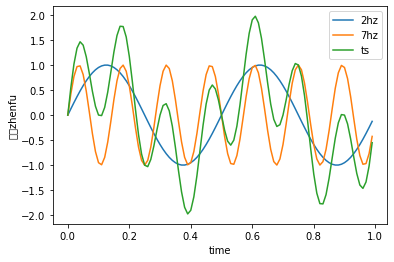

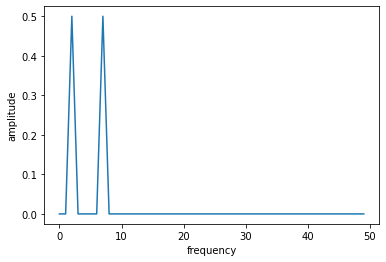

In [207]:
import numpy as np
import matplotlib.pyplot as plt
#产生正弦信号
samplingFrequency=100
time=np.arange(0,1,1/samplingFrequency)
sine1 = np.sin(2*np.pi*2*time)
sine2 = np.sin(2*np.pi*7*time)
# sine3 = np.sin(2*np.pi*10*time)
# sine4 = np.sin(2*np.pi*25*time)
# sine5 = np.sin(2*np.pi*40*time)
ts=sine1+sine2
# ts=sine1+sine2+sine3+sine4+sine5
plt.plot(time,sine1,label="2hz")
plt.plot(time,sine2,label="7hz")
plt.plot(time,ts,label="ts")
plt.ylabel('振幅zhenfu')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

#快速傅里叶变换
fT=np.fft.fft(ts)/len(ts)
fT=fT[range(int(len(ts)/2))]

tpCount=len(ts)
values=np.arange(int(tpCount/2))
timePeriod = tpCount/samplingFrequency
frequencies=values/timePeriod
plt.plot(frequencies,abs(fT))
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

- (微波/小波)Wavelets

无法告诉我们时间序列中哪个频率出现，也不能告诉某个频率在哪儿出现；

怎么办？通过小波代替正弦波！

In [ ]:
################

- 分段聚合近似法，Piecewise Aggregate Approximation (PAA) 

主要是为了降维

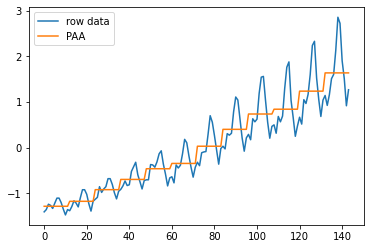

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation

df = pd.read_csv('dataset/passengers.csv',header=0,index_col=0)
df_series=df.iloc[:,0]
dataset=df_series.values#(144,)
dataset=dataset.reshape(1,144)#(1,144)

#TimeSeriesScalerMeanVariance，
#就是数据标准化吧？
#时间序列的定标器。缩放时间序列，使其在每个维度中的平均值（分别为标准差）为 mu（分别为标准差）
#mu，输出时间序列的平均值。默认0
#std，输出时间序列的标准差。默认1
scaler=TimeSeriesScalerMeanVariance(mu=0,std=1)
dataset=scaler.fit_transform(dataset)#适合数据，然后转换它。

paa=PiecewiseAggregateApproximation(n_segments=12)
paa_dataset_inv=paa.inverse_transform(paa.fit_transform(dataset))
plt.plot(dataset[0].ravel(),label="row data")
plt.plot(paa_dataset_inv[0].ravel(),label='PAA')
plt.legend()
plt.show()


- 符号累积近似,Symbolic Aggregate Approximation (SAX)

简单的说是一种把时间序列进行符号化表示的方法。(把序列变成字符串)

1.可以进行数据降维。

2.可以在符号表示上定义距离度量，并且满足下界定理。

3.可以进行数据压缩。

4.SAX保留了原始时间序列的大体形状。SAX是一种符号表示法，因此字母表可以存储为位（bits）而不是双精度浮点数，从而节省了大量空间。

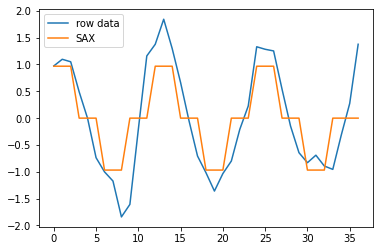

In [233]:
import numpy as np
import matplotlib.pyplot as plot
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

df = pd.read_csv('dataset/HalmstadTempM.csv',header=0,index_col=0)
df_series=df.iloc[:,0]
dataset=df_series.values#(37,)
dataset=dataset.reshape(1,37)#(1,37)

scaler=TimeSeriesScalerMeanVariance(mu=0,std=1)
dataset=scaler.fit_transform(dataset)

sax=SymbolicAggregateApproximation(n_segments=12,alphabet_size_avg=3)
sax_dataset_inv=sax.inverse_transform(sax.fit_transform(dataset))
plt.plot(dataset[0].ravel(),label="row data")
plt.plot(sax_dataset_inv[0].ravel(),label='SAX')
plt.legend()
plt.show()

#####sax是转化序列，用字符串表示

# 时序分类
- DWT+KNN
- feature-based
    - requires prior knowledge
- deep learning
- sax
    - for long series

# 准备时序数据

- Missing Values(缺失值) ：用插值pandas自带的series.interpolate
- Noise Removal(噪声)
- Normalization(归一化),standardization(标准化)
- Resampling(重采样)


In [241]:
#缩放到均值为0，方差为1，标准化
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt
df= read_csv('dataset/passengers.csv', header=0, index_col=0)
ts=df.iloc[:, :]
values = ts.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, Std: %f' % (scaler.mean_, sqrt(scaler.var_)))
normalized = scaler.transform(values)
print (normalized)
inversed = scaler.inverse_transform(normalized)
print (inversed)



Mean: 280.298611, Std: 119.549042
[[-1.40777884]
 [-1.35759023]
 [-1.24048348]
 [-1.26557778]
 [-1.33249593]
 [-1.21538918]
 [-1.10664719]
 [-1.10664719]
 [-1.20702441]
 [-1.34922546]
 [-1.47469699]
 [-1.35759023]
 [-1.38268454]
 [-1.29067209]
 [-1.16520057]
 [-1.21538918]
 [-1.29903686]
 [-1.09828242]
 [-0.9226223 ]
 [-0.9226223 ]
 [-1.02299951]
 [-1.23211871]
 [-1.3910493 ]
 [-1.17356534]
 [-1.1317415 ]
 [-1.08991766]
 [-0.85570415]
 [-0.98117567]
 [-0.90589276]
 [-0.85570415]
 [-0.68004402]
 [-0.68004402]
 [-0.80551554]
 [-0.98954044]
 [-1.12337673]
 [-0.95608137]
 [-0.91425753]
 [-0.83897462]
 [-0.73023263]
 [-0.83060985]
 [-0.81388031]
 [-0.52111343]
 [-0.42073621]
 [-0.320359  ]
 [-0.59639634]
 [-0.74696217]
 [-0.90589276]
 [-0.72186786]
 [-0.70513833]
 [-0.70513833]
 [-0.37054761]
 [-0.37891237]
 [-0.42910098]
 [-0.31199423]
 [-0.1363341 ]
 [-0.06941596]
 [-0.36218284]
 [-0.57966681]
 [-0.83897462]
 [-0.66331449]
 [-0.63822018]
 [-0.77205647]
 [-0.37891237]
 [-0.44583052]
 [-0.3

In [242]:
#缩放到0和1之间，归一化
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
df= read_csv('dataset/passengers.csv', header=0, index_col=0)
ts=df.iloc[:, :]
values = ts.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
normalized = scaler.transform(values)
print (normalized)
inversed = scaler.inverse_transform(normalized)
print (inversed)

Min: 104.000000, Max: 622.000000
[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 